In [29]:
import seaborn as sns
import json
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Angle between two vectors in degrees.
def vang(a, b): 
    return np.arccos(a.dot(b)) / np.pi * 180

# Vector from two angles
def vec(x):
    return np.array([np.cos(x[0]) * np.sin(x[1]), np.sin(x[0]) * np.sin(x[1]), np.cos(x[1])])

# convert in-game angles to radian coordiantes
def gamea(a, b):
    return [b / 180 * np.pi, (90 - a) / 180 * np.pi]

# pixels distance between two vectors (a,b) and (c,d) defined by in-game angles.
def points(a, b, c, d):
    return vang(vec(gamea(a, b)), vec(gamea(c, d))) / 0.022

def vector_length(x, y):
    return np.sqrt(x * x + y * y)

def diff(a, b):
#     return sum([abs(x[0] - x[1]) for x in zip(a, b)])
#     return pow(sum(d), 0.5)
    d = [pow(x[0] - x[1], 2) for x in zip(a, b)]
    return sum([max(x - 3, 0) for x in d])

def dist_score(x):
    return np.exp(-0.0004 * np.power(x, 2))

def rc_score(r1, r2):
    return 100 * np.mean([dist_score(vector_length(r1['x'][i] - r2['x'][i], r1['y'][i] - r2['y'][i])) for i in range(len(r1['x']))])

def mean_recoil(rc):
    mx = [0]
    my = [0]
    mt = [0]
    x = 0
    y = 0
    n = len(rc[0]['x'])
    for i in range(1, n):
        dx = []
        dy = []
        for r in rc:
            dx.append(r['x'][i] - r['x'][i-1])
            dy.append(r['y'][i] - r['y'][i-1])
        x += np.mean(dx)
        y += np.mean(dy) # sic
        mx.append(np.round(x, 1))
        my.append(np.round(y, 1))
        mt.append(int(i * 60 * 1000 / 810))
    return mx, my

In [34]:
np.round(points(2.43, -88.81, -5.96,-87.47), 2)

386.18

In [37]:
rc = [
   {"weapon":"flatline","barrel":"0","stock":"0","comment":"flatline 0 0 0 346.46.png","x":[0,6.3,9.7,-23.8,-33.1,-45.7,-49.6,-41.4,-22.4,-11.2,-1.9,1,-15.1,-35.5,-51.6,-81.3,-93.9,-89.5,-91.5,-112.4,-136.7,-150.8,-144,-127.5,-111.4,-87.6,-66.7,-46.7,-33.1,-19],"y":[0,-51.6,-56.4,-92.9,-112.9,-141.6,-168.3,-171.3,-162,-161,-168.3,-186.8,-190.7,-207.3,-214.1,-204.8,-200,-216,-240.8,-249.6,-251.5,-251.5,-269.1,-275.9,-287.1,-296.3,-308,-305.6,-324,-345.9]},
    {"weapon":"flatline","barrel":"0","stock":"0","comment":"flatline 0 0 1 365.4.png","x":[0,-20.1,-35.8,-50.4,-64,-66.2,-70,-56.4,-29.3,-22.2,-10.8,-0.5,-9.8,-24.9,-39.6,-64.5,-71.6,-68.9,-70,-79.2,-109.5,-120.4,-123.1,-98.7,-82.4,-61.8,-48.8,-28.2,-24.4,-18.4],"y":[0,-46.1,-70,-100.3,-115,-142.1,-173.5,-183.3,-180.6,-176.8,-190.9,-212.6,-214.2,-232.6,-236.4,-231.5,-231.5,-258.7,-288.5,-296.1,-302.6,-300.9,-315,-328.1,-336.2,-338.4,-343.8,-330.8,-346.5,-364.9]},
    {"weapon":"flatline","barrel":"0","stock":"0","comment":"flatline 0 0 2 407.33.png","x":[0,-16.2,-10.6,-27.3,-41.2,-51.3,-59.6,-51.3,-27.9,-21.2,-11.7,-4.5,-20.1,-46.8,-49.6,-64.6,-67.4,-74.6,-76.9,-93,-114.2,-115.9,-124.2,-110.3,-108.1,-93,-79.1,-60.2,-61.3,-52.9],"y":[0,-43.5,-65.2,-98.6,-119.8,-144.3,-172.7,-188.3,-190,-184.9,-194.4,-220.6,-232.3,-242.9,-253.5,-257.9,-256.3,-287.4,-319.8,-327.6,-328.7,-332.6,-351,-366,-368.2,-380.5,-391.6,-378.8,-388.8,-403.9]},
    {"weapon":"flatline","barrel":"0","stock":"0","comment":"flatline 0 0 3 357.13.png","x":[0,-2.5,-12.9,-24.8,-37.7,-38.7,-43.7,-34.3,-18.4,-11.4,-7.9,-1,-14.9,-42.2,-65,-95.3,-108.2,-118.6,-122.6,-139.5,-159.8,-176.2,-171.3,-157.9,-142,-125.1,-105.7,-90.3,-91.3,-82.4],"y":[0,-52.6,-68,-87.9,-106.2,-126.6,-151.9,-153.9,-147.4,-144,-159.4,-186.7,-198.1,-208.5,-211.5,-199.1,-200.1,-225.9,-252.2,-266.1,-277,-278,-295.4,-304.8,-309.8,-316.7,-329.6,-321.7,-334.1,-347.5]},
    {"weapon":"flatline","barrel":"0","stock":"0","comment":"flatline 0 0 4 352.25.png","x":[0,-19.1,-9.8,-24.5,-45.6,-46.6,-44.1,-31.9,-14.7,-5.4,1.5,12.3,5.4,-26,-47,-76,-76,-74,-80.9,-92.1,-119.1,-136.7,-137.2,-119.6,-100.9,-84.8,-59.8,-49,-38.7,-25],"y":[0,-49,-71.1,-94.1,-107.3,-130.8,-155.3,-167.6,-165.1,-159.8,-174.9,-198.5,-207.3,-226.4,-233.3,-230.8,-237.2,-253.4,-269.5,-282.8,-290.6,-291.6,-302.8,-306.8,-311.2,-316.1,-322.9,-321.5,-334.7,-351.4]},
]

{"x": [0, -10.3, -11.9, -30.2, -44.3, -49.7, -53.4, -43.1, -22.5, -14.3, -6.2, 1.5, -10.9, -35.1, -50.6, -76.3, -83.4, -85.1, -88.4, -103.2, -127.9, -140.0, -140.0, -122.8, -109.0, -90.5, -72.0, -54.9, -49.8, -39.5]}
{"y": [0, -48.6, -66.1, -94.8, -112.2, -137.1, -164.3, -172.9, -169.0, -165.3, -177.6, -201.0, -208.5, -223.5, -229.8, -224.8, -225.0, -248.3, -274.2, -284.4, -290.1, -290.9, -306.7, -316.3, -322.5, -329.6, -339.2, -331.7, -345.6, -362.7]}

{"time_points": [0, 64, 129, 193, 258, 322, 387, 451, 516, 580, 645, 709, 774, 838, 903, 967, 1032, 1096, 1161, 1225, 1290, 1354, 1419, 1483, 1548, 1612, 1677, 1741, 1806, 1870]}
const float mx[] = { 0,-10.3,-11.9,-30.2,-44.3,-49.7,-53.4,-43.1,-22.5,-14.3,-6.2,1.5,-10.9,-35.1,-50.6,-76.3,-83.4,-85.1,-88.4,-103.2,-127.9,-140.0,-140.0,-122.8,-109.0,-90.5,-72.0,-54.9,-49.8,-39.5 };
const float my[] = { 0,-48.6,-66.1,-94.8,-112.2,-137.1,-164.3,-172.9,-169.0,-165.3,-177.6,-201.0,-208.5,-223.5,-229.8,-224.8,-225.0,-248.3,-274.2,-284.4,-290.1,

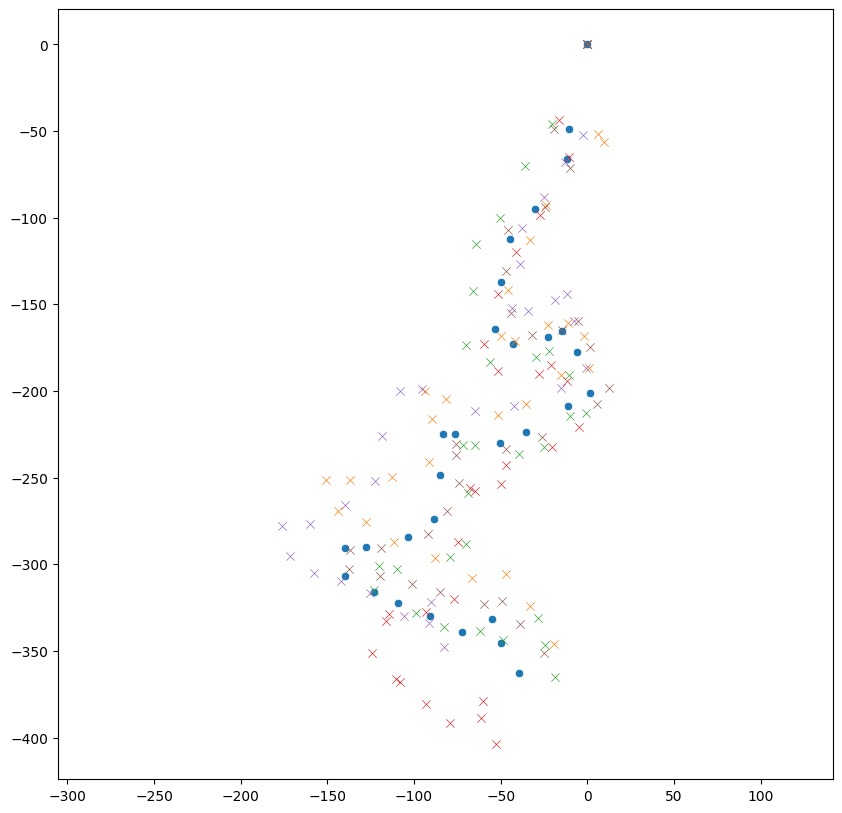

In [38]:
_, ax = plt.subplots(figsize=(10,10))
plt.axis('equal')
x, y = mean_recoil(rc)
sns.scatterplot(ax=ax, x=x, y=y)

# sns.scatterplot(ax=ax, x=tc['x'], y=tc['y'])
for r in rc:
    sns.scatterplot(ax=ax, x=r['x'], y=r['y'], marker='x')
# x, y = mean_recoil(rc[:7])
# sns.scatterplot(ax=ax, x=x, y=y)
print(json.dumps({'x': x}))
print(json.dumps({'y': y}))
print()
n = len(rc[0]['x'])
rpm = 930
t = [int(i * 60 * 1000 / rpm) for i in range(n)]
print(json.dumps({'time_points': t}))
print('const float mx[] = {', ','.join(str(i) for i in x), '};')
print('const float my[] = {', ','.join(str(i) for i in y), '};')
print('const long mt[] ={', ','.join(str(i) for i in t), '};')
print('const long n =',n, ';')
# ','.join(str(i) for i in x), ','.join(str(i) for i in y)

bad 2 flatline 0 0 2 407.33.png


(0.053074828944552184,
 False,
 [79.61074457575351,
  85.86821169166389,
  67.53761337828357,
  73.94583778910818,
  95.33300761456971])

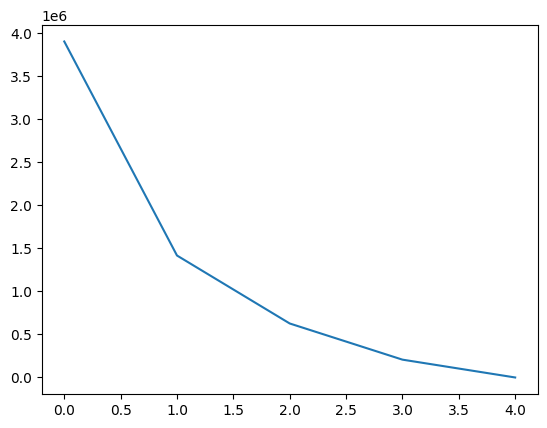

In [39]:
err = [0] * len(rc)
maxerr = [0] * len(rc)
minerr = [100000000] * len(rc)
n = 55
tx, ty = mean_recoil(rc)
for i in range(200):
    t = np.random.permutation(rc)
    for j in range(len(t)):
        x, y = mean_recoil(t[:j+1])
        d = diff(x, tx) + diff(y, ty)
        err[j] += d
        minerr[j] = min(minerr[j], d)
        maxerr[j] = max(maxerr[j], d)

bd = 0
bi = 0
for i, r in enumerate(rc):
    d = diff(r['x'][:n], tx) + diff(r['y'][:n], ty)
    if d > bd:
        bd = d
        bi = i
print('bad', bi, rc[bi]['comment'])
sns.lineplot(x=range(len(rc)), y=[x for x in err])
d = err[-2] / err[0]
d, d < 0.01, [rc_score(r, {'x': tx, 'y': ty}) for r in rc]